In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder, StandardScaler
from scipy.stats import zscore, yeojohnson
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression, LinearRegression, Ridge
from sklearn.metrics import plot_roc_curve, accuracy_score, r2_score, confusion_matrix, mean_squared_error, classification_report, mean_absolute_error
from sklearn.utils import resample
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.svm import SVC, SVR
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
import joblib

import warnings
warnings.filterwarnings('ignore')

# Data Collection

In [ ]:
df = pd.read_csv(r'C:\Users\Shubham\Desktop\Projects\Evaluation\(3)_Avocado\avocado.csv')

# Data Understanding

In [ ]:
df.head() #Looking into the top 5 rows of the dataset

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


The columns are:
- Date - The date of the observation
- AveragePrice - the average price of a single avocado
- type - conventional or organic
- year - the year
- Region - the city or region of the observation
- Total Volume - Total number of avocados sold
- 4046 - Total number of avocados with PLU 4046 sold
- 4225 - Total number of avocados with PLU 4225 sold
- 4770 - Total number of avocados with PLU 4770 sold

In [ ]:
df.shape #Looking into the shape of the dataset

(18249, 14)

In [ ]:
df.columns #Calling all the column names of the dataset

Index(['Unnamed: 0', 'Date', 'AveragePrice', 'Total Volume', '4046', '4225',
       '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type',
       'year', 'region'],
      dtype='object')

In [ ]:
df.info() #Basic info of the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


Here we see that region, type and Date are object type. Others numerical with no null values in any.

In [ ]:
df.isnull().sum() #Checking for null values again

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

<AxesSubplot:>

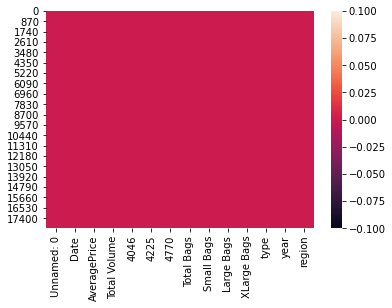

In [ ]:
sns.heatmap(df.isnull()) #Visualization of null values

In [ ]:
df.describe() #Statistical evaluation of teh dataset

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,24.232232,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,15.481045,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.000000,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,10.000000,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,24.000000,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,38.000000,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,52.000000,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


Data looks good, no missing values values

# Exploratory Data Analysis

Let us now look into all the columns one at a time, beginning with the target columns AveragePrice and region

<AxesSubplot:xlabel='AveragePrice', ylabel='Density'>

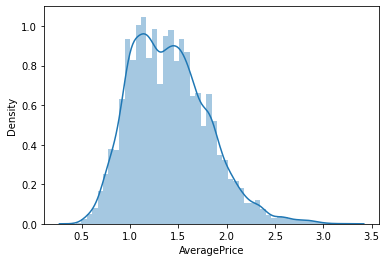

In [ ]:
sns.distplot(df['AveragePrice'])

Data is almost normal with little skewness, we shall treat it later


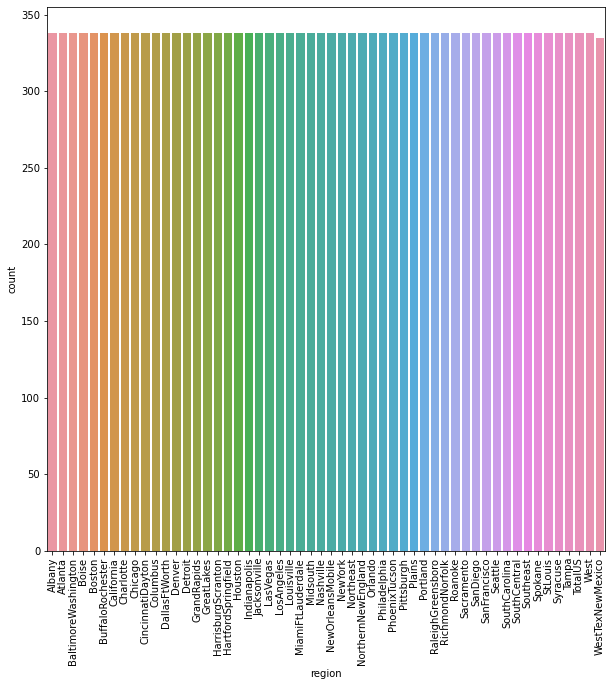

In [ ]:
#Count plot for the region column
plt.figure(figsize=(10,10))
sns.countplot(df['region'])
plt.xticks(rotation=90)
plt.show()

The column 'Unnamed: 0' is just indexing so we should just drop it as it should not influence the model in teh prediction

In [ ]:
df.drop(columns='Unnamed: 0',inplace=True) #Dropping the unrequired column

In [ ]:
df.columns

Index(['Date', 'AveragePrice', 'Total Volume', '4046', '4225', '4770',
       'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year',
       'region'],
      dtype='object')

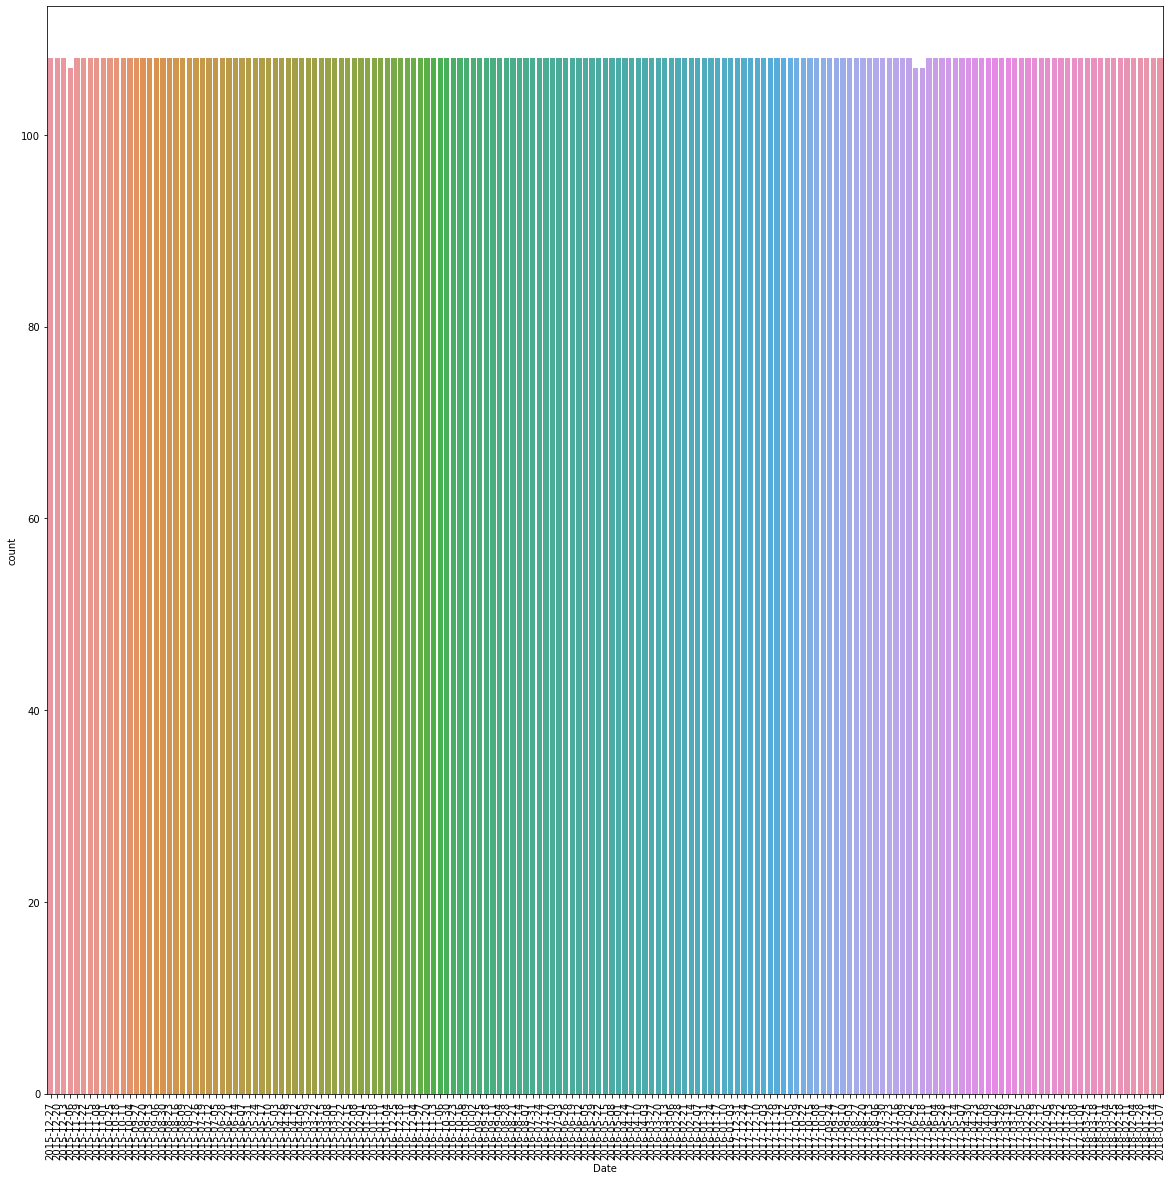

In [ ]:
#Count plot for the region column
plt.figure(figsize=(20,20))
sns.countplot(df['Date'])
plt.xticks(rotation=90)
plt.show()

In [ ]:
df['Date'].value_counts()

2017-11-12    108
2017-03-19    108
2017-12-17    108
2016-12-18    108
2015-01-25    108
             ... 
2016-02-21    108
2017-05-14    108
2015-12-06    107
2017-06-25    107
2017-06-18    107
Name: Date, Length: 169, dtype: int64

We see that data is evenly distributed. However, let us break the date into months and days

In [ ]:
df['Date']=pd.to_datetime(df['Date']) #Putting into date format
df['Month']=df['Date'].apply(lambda x:x.month) #Taking Month
df['Day']=df['Date'].apply(lambda x:x.day) #Taking day

In [ ]:
df

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,12,27
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,12,20
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,12,13
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,12,6
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,11,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico,2,4
18245,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico,1,28
18246,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico,1,21
18247,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico,1,14


<AxesSubplot:xlabel='Month', ylabel='AveragePrice'>

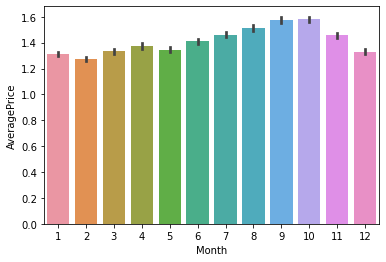

In [ ]:
#Bar plot for Month
sns.barplot(x='Month', y='AveragePrice', data=df)

<AxesSubplot:xlabel='Month'>

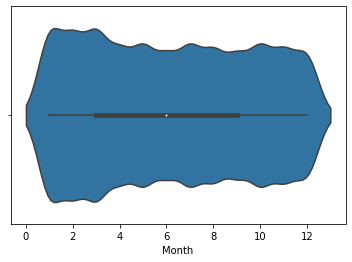

In [ ]:
#Violin plot for Month
sns.violinplot(df['Month'])

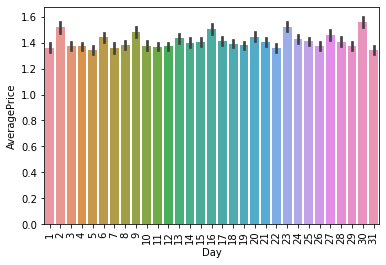

In [ ]:
#Bar plot for Day
plt.figure()
sns.barplot(x='Day', y='AveragePrice', data=df)
plt.xticks(rotation=90)
plt.show()

<AxesSubplot:xlabel='Day'>

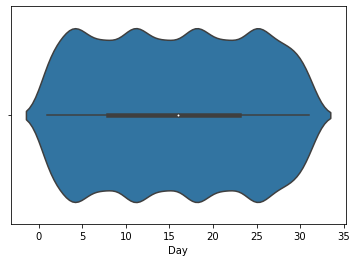

In [ ]:
#Violin plot for Day
sns.violinplot(df['Day'])

Since we have split the date column, we dont need it anymore

In [ ]:
df.drop(columns='Date',inplace=True)

In [ ]:
df.shape

(18249, 14)

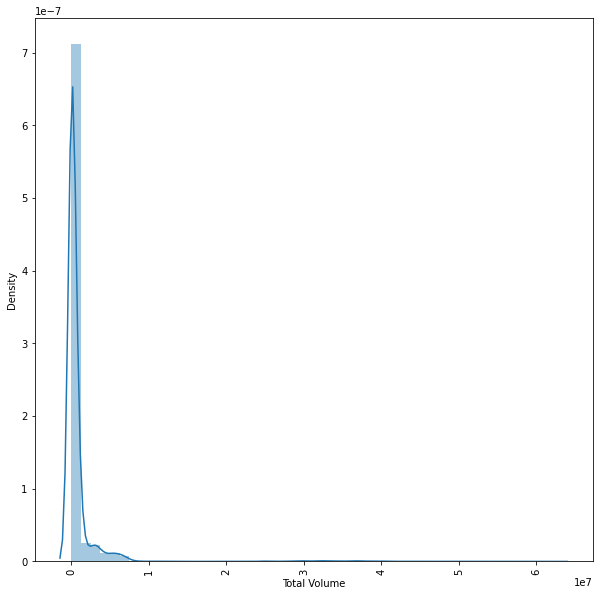

In [ ]:
#Count plot for the Total Volume
plt.figure(figsize=(10,10))
sns.distplot(df['Total Volume'])
plt.xticks(rotation=90)
plt.show()

<AxesSubplot:xlabel='Total Volume'>

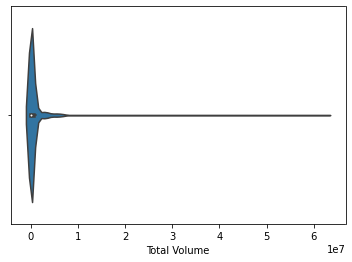

In [ ]:
#Violin plot for Total Volume
sns.violinplot(df['Total Volume'])

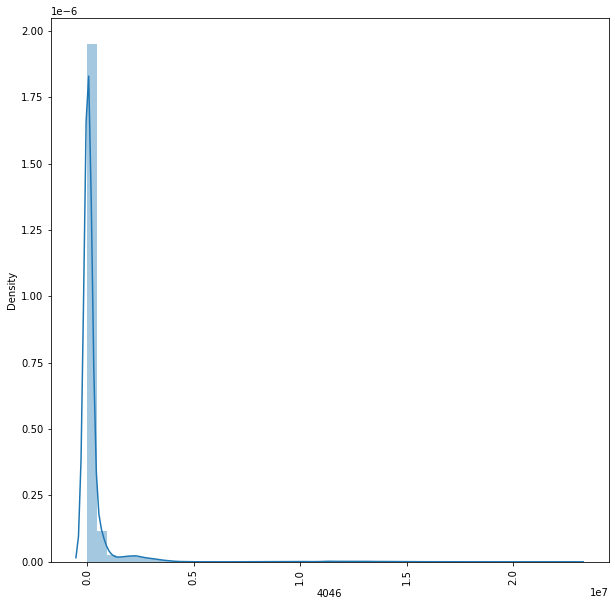

In [ ]:
#Density plot for the 4046
plt.figure(figsize=(10,10))
sns.distplot(df['4046'])
plt.xticks(rotation=90)
plt.show()

<AxesSubplot:xlabel='4046'>

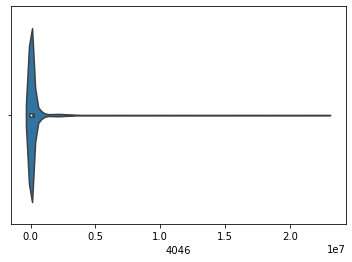

In [ ]:
#Violin plot for 4046
sns.violinplot(df['4046'])

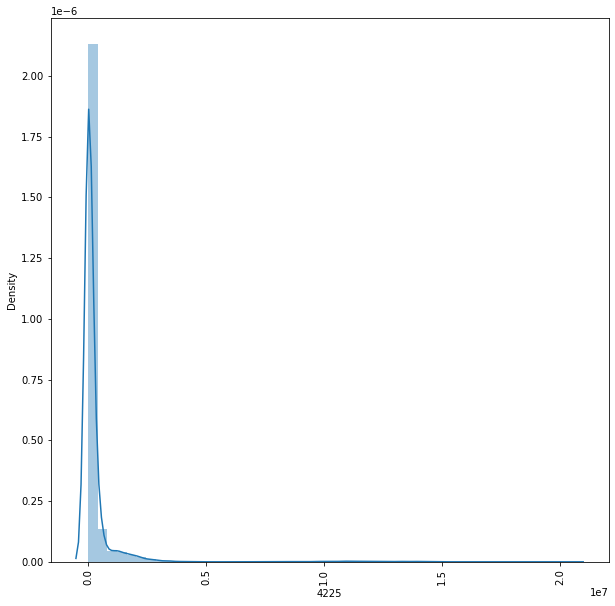

In [ ]:
#Density plot for the 4225
plt.figure(figsize=(10,10))
sns.distplot(df['4225'])
plt.xticks(rotation=90)
plt.show()

<AxesSubplot:xlabel='4225'>

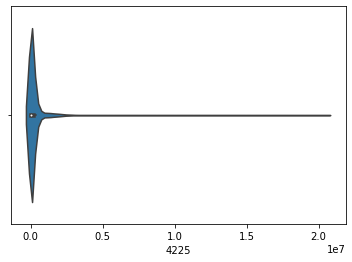

In [ ]:
#Violin plot for 4225
sns.violinplot(df['4225'])

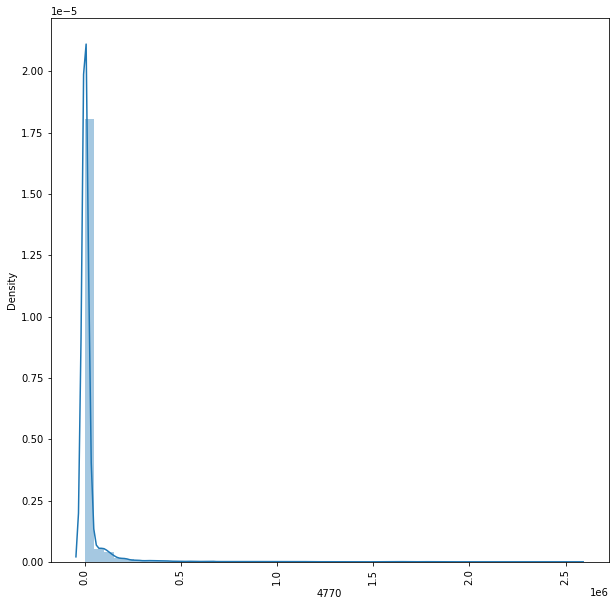

In [ ]:
#Density plot for the 4770
plt.figure(figsize=(10,10))
sns.distplot(df['4770'])
plt.xticks(rotation=90)
plt.show()

<AxesSubplot:xlabel='4770'>

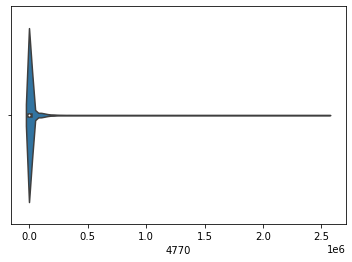

In [ ]:
#Violin plot for 4770
sns.violinplot(df['4770'])

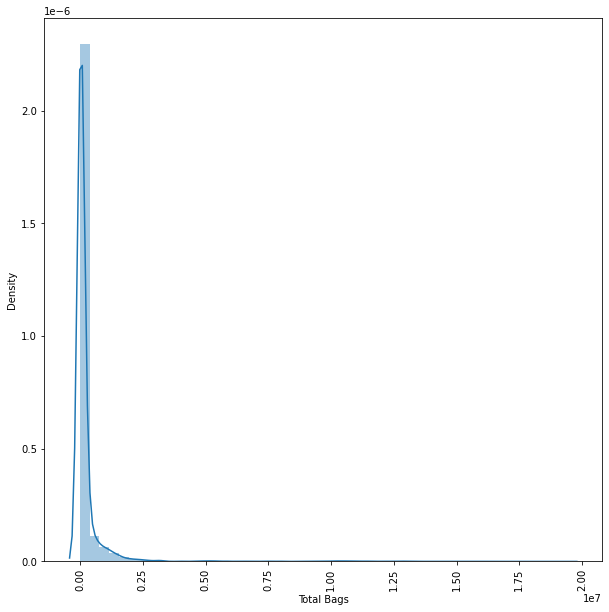

In [ ]:
#Density plot for the Total Bags
plt.figure(figsize=(10,10))
sns.distplot(df['Total Bags'])
plt.xticks(rotation=90)
plt.show()

<AxesSubplot:xlabel='Total Bags'>

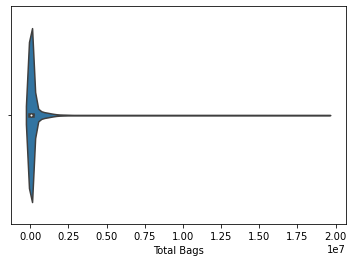

In [ ]:
#Violin plot for Total Bags
sns.violinplot(df['Total Bags'])

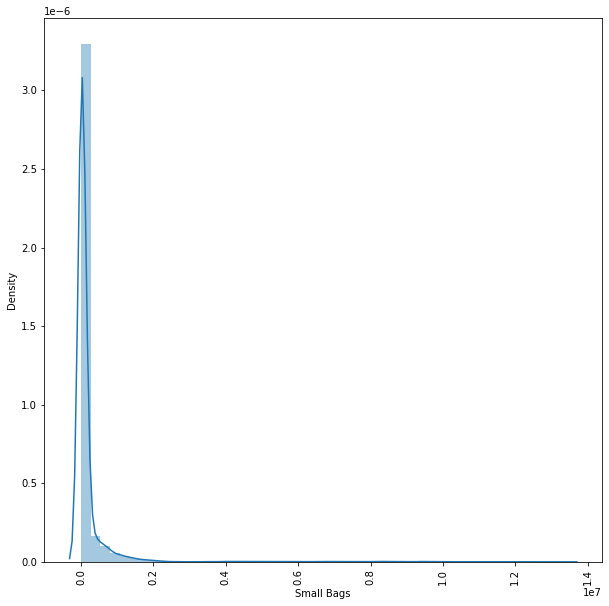

In [ ]:
#Density plot for the Small Bags
plt.figure(figsize=(10,10))
sns.distplot(df['Small Bags'])
plt.xticks(rotation=90)
plt.show()

<AxesSubplot:xlabel='Small Bags'>

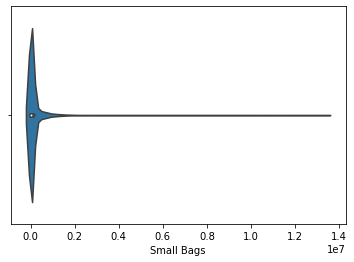

In [ ]:
#Violin plot for Small Bags
sns.violinplot(df['Small Bags'])

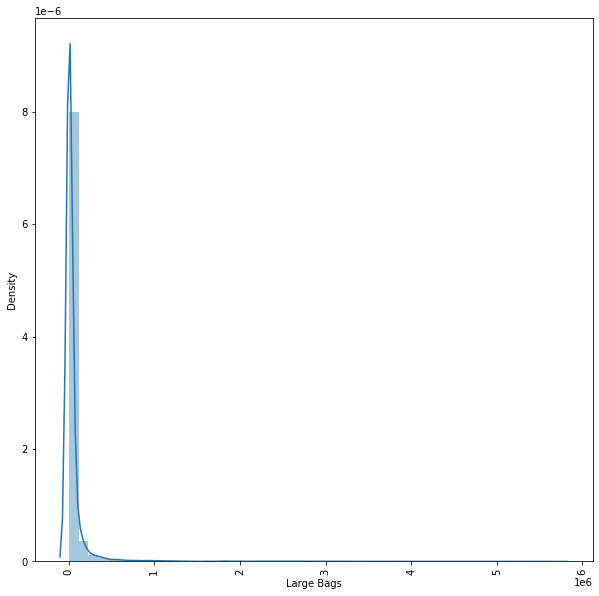

In [ ]:
#Density plot for the Large Bags
plt.figure(figsize=(10,10))
sns.distplot(df['Large Bags'])
plt.xticks(rotation=90)
plt.show()

<AxesSubplot:xlabel='Large Bags'>

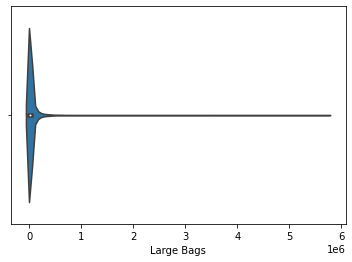

In [ ]:
#Violin plot for Large Bags
sns.violinplot(df['Large Bags'])

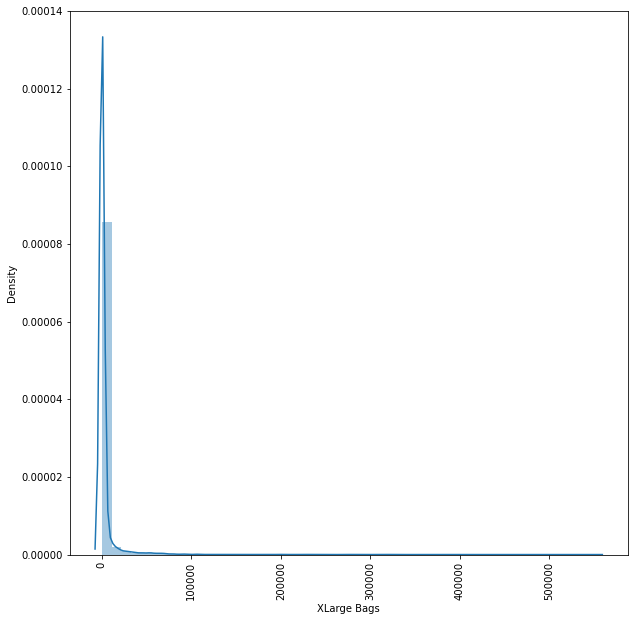

In [ ]:
#Density plot for the XLarge Bags
plt.figure(figsize=(10,10))
sns.distplot(df['XLarge Bags'])
plt.xticks(rotation=90)
plt.show()

<AxesSubplot:xlabel='XLarge Bags'>

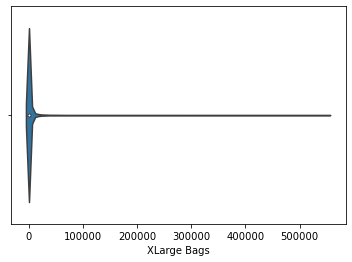

In [ ]:
#Violin plot for XLarge Bags
sns.violinplot(df['XLarge Bags'])

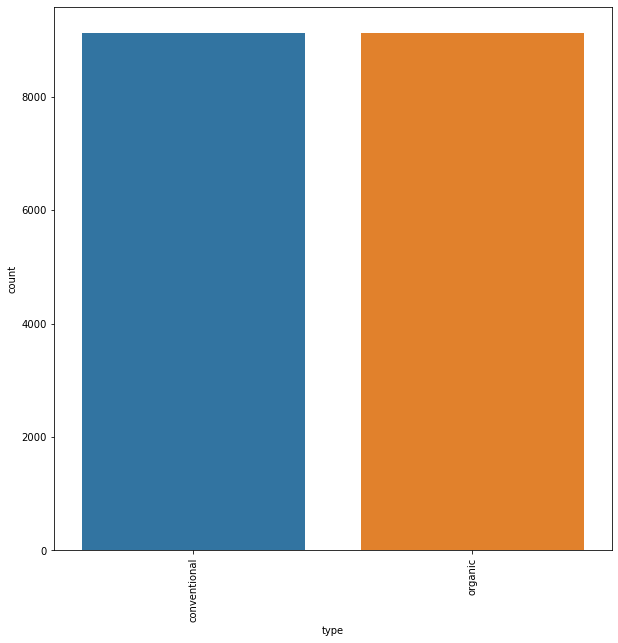

In [ ]:
#Count plot for the type
plt.figure(figsize=(10,10))
sns.countplot(df['type'])
plt.xticks(rotation=90)
plt.show()

In [ ]:
df['type'].value_counts() #Checking for count of both the classification

conventional    9126
organic         9123
Name: type, dtype: int64

Let us treat the column with Label Encoder

In [ ]:
le = LabelEncoder()
df['type'] = le.fit_transform(df['type']) #Encoding data

In [ ]:
df['type'].value_counts()

0    9126
1    9123
Name: type, dtype: int64

We changed:
- conventional : 0
- organic      : 1

<AxesSubplot:xlabel='type'>

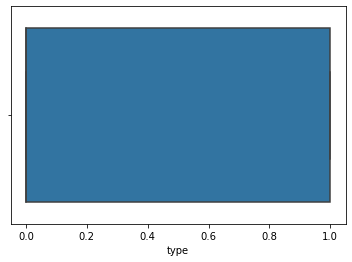

In [ ]:
#Box plot for type
sns.boxplot(df['type'])

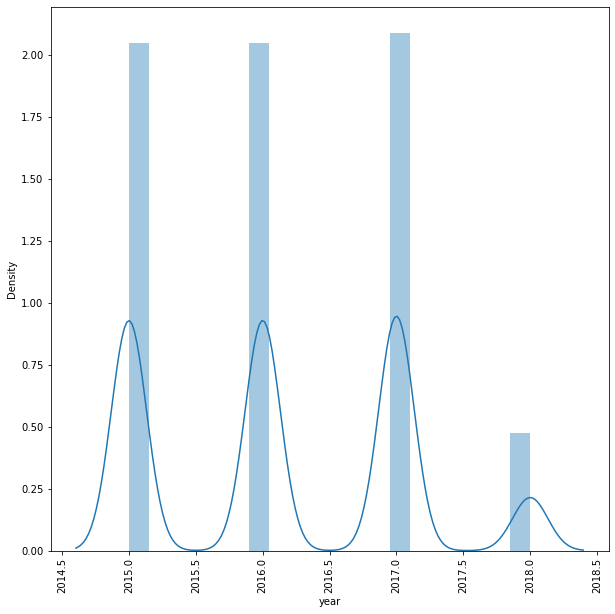

In [ ]:
#Density plot for the year
plt.figure(figsize=(10,10))
sns.distplot(df['year'])
plt.xticks(rotation=90)
plt.show()

<AxesSubplot:xlabel='year'>

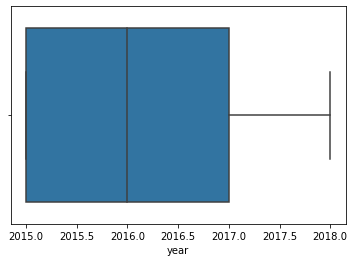

In [ ]:
sns.boxplot(df['year'])

In [ ]:
#Checking type distribution among the years
df.groupby('year')['type'].value_counts()

year  type
2015  0       2808
      1       2807
2016  0       2808
      1       2808
2017  0       2862
      1       2860
2018  0        648
      1        648
Name: type, dtype: int64

The data is pretty normally distributed

In [ ]:
#Finding mean of Average Price of avocado among the years
df.groupby('year')['AveragePrice'].mean()

year
2015    1.375590
2016    1.338640
2017    1.515128
2018    1.347531
Name: AveragePrice, dtype: float64

<AxesSubplot:xlabel='year', ylabel='AveragePrice'>

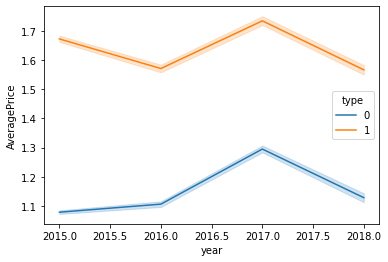

In [ ]:
#Visualization of the price distribution of avocados over the year
sns.lineplot(x='year',y='AveragePrice',hue='type',data=df)

The average price was higher for the year 2017 among others. However, the distribution is good

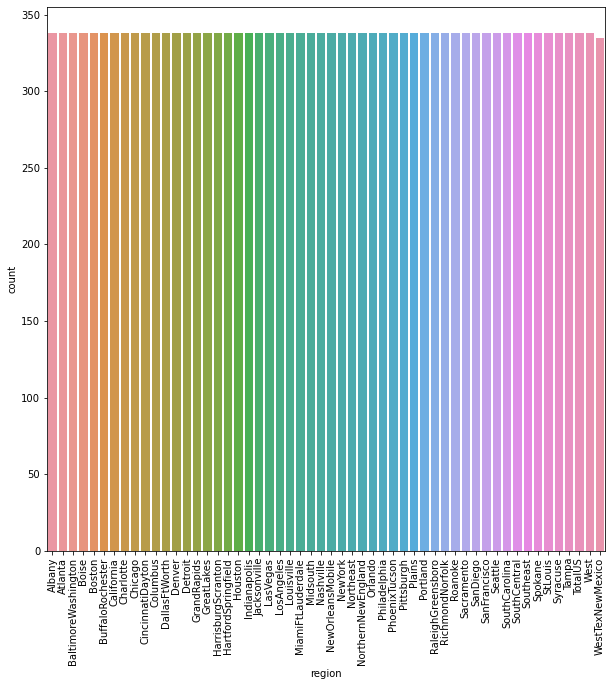

In [ ]:
#Count plot for the region
plt.figure(figsize=(10,10))
sns.countplot(df['region'])
plt.xticks(rotation=90)
plt.show()

Data is distributed evenly, however let us encode it using Ordinal Encoder

In [ ]:
df['region'].nunique()

54

In [ ]:
df['region'].unique()

array(['Albany', 'Atlanta', 'BaltimoreWashington', 'Boise', 'Boston',
       'BuffaloRochester', 'California', 'Charlotte', 'Chicago',
       'CincinnatiDayton', 'Columbus', 'DallasFtWorth', 'Denver',
       'Detroit', 'GrandRapids', 'GreatLakes', 'HarrisburgScranton',
       'HartfordSpringfield', 'Houston', 'Indianapolis', 'Jacksonville',
       'LasVegas', 'LosAngeles', 'Louisville', 'MiamiFtLauderdale',
       'Midsouth', 'Nashville', 'NewOrleansMobile', 'NewYork',
       'Northeast', 'NorthernNewEngland', 'Orlando', 'Philadelphia',
       'PhoenixTucson', 'Pittsburgh', 'Plains', 'Portland',
       'RaleighGreensboro', 'RichmondNorfolk', 'Roanoke', 'Sacramento',
       'SanDiego', 'SanFrancisco', 'Seattle', 'SouthCarolina',
       'SouthCentral', 'Southeast', 'Spokane', 'StLouis', 'Syracuse',
       'Tampa', 'TotalUS', 'West', 'WestTexNewMexico'], dtype=object)

In [ ]:
#Encoding data
c = df['region'].unique()
oe = OrdinalEncoder(categories=[c])
df['region'] = oe.fit_transform(df[['region']])

In [ ]:
df['region'].unique()

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.,
       26., 27., 28., 29., 30., 31., 32., 33., 34., 35., 36., 37., 38.,
       39., 40., 41., 42., 43., 44., 45., 46., 47., 48., 49., 50., 51.,
       52., 53.])

The data has been encoder into 54 variables, ranging from 0 to 53 in the above order

<AxesSubplot:xlabel='region'>

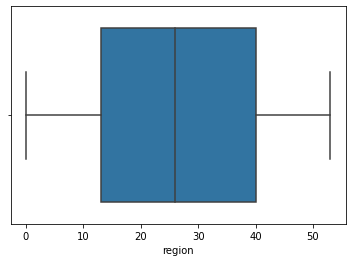

In [ ]:
#Box plot for region
sns.boxplot(df['region'])

# Correlation

Now, since all the data has been transformed into numeric values. Let us check for the correlation to the target column

In [ ]:
df.corr() #Correlation matrix

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
AveragePrice,1.000000,-0.192752,-0.208317,-0.172928,-0.179446,-0.177088,-0.174730,-0.172940,-0.117592,0.615845,0.093197,-0.011716,0.162409,0.027386
Total Volume,-0.192752,1.000000,0.977863,0.974181,0.872202,0.963047,0.967238,0.880640,0.747157,-0.232434,0.017193,0.174176,-0.024689,-0.009747
4046,-0.208317,0.977863,1.000000,0.926110,0.833389,0.920057,0.925280,0.838645,0.699377,-0.225819,0.003353,0.192073,-0.025803,-0.010159
4225,-0.172928,0.974181,0.926110,1.000000,0.887855,0.905787,0.916031,0.810015,0.688809,-0.232289,-0.009559,0.145726,-0.022108,-0.012393
4770,-0.179446,0.872202,0.833389,0.887855,1.000000,0.792314,0.802733,0.698471,0.679861,-0.210027,-0.036531,0.095252,-0.033424,-0.009009
Total Bags,-0.177088,0.963047,0.920057,0.905787,0.792314,1.000000,0.994335,0.943009,0.804233,-0.217788,0.071552,0.175256,-0.022724,-0.004988
Small Bags,-0.174730,0.967238,0.925280,0.916031,0.802733,0.994335,1.000000,0.902589,0.806845,-0.220535,0.063915,0.164702,-0.023126,-0.003870
Large Bags,-0.172940,0.880640,0.838645,0.810015,0.698471,0.943009,0.902589,1.000000,0.710858,-0.193177,0.087891,0.198768,-0.020187,-0.008352
XLarge Bags,-0.117592,0.747157,0.699377,0.688809,0.679861,0.804233,0.806845,0.710858,1.000000,-0.175483,0.081033,0.082281,-0.012969,0.000319
type,0.615845,-0.232434,-0.225819,-0.232289,-0.210027,-0.217788,-0.220535,-0.193177,-0.175483,1.000000,-0.000032,-0.000280,-0.000085,-0.000013


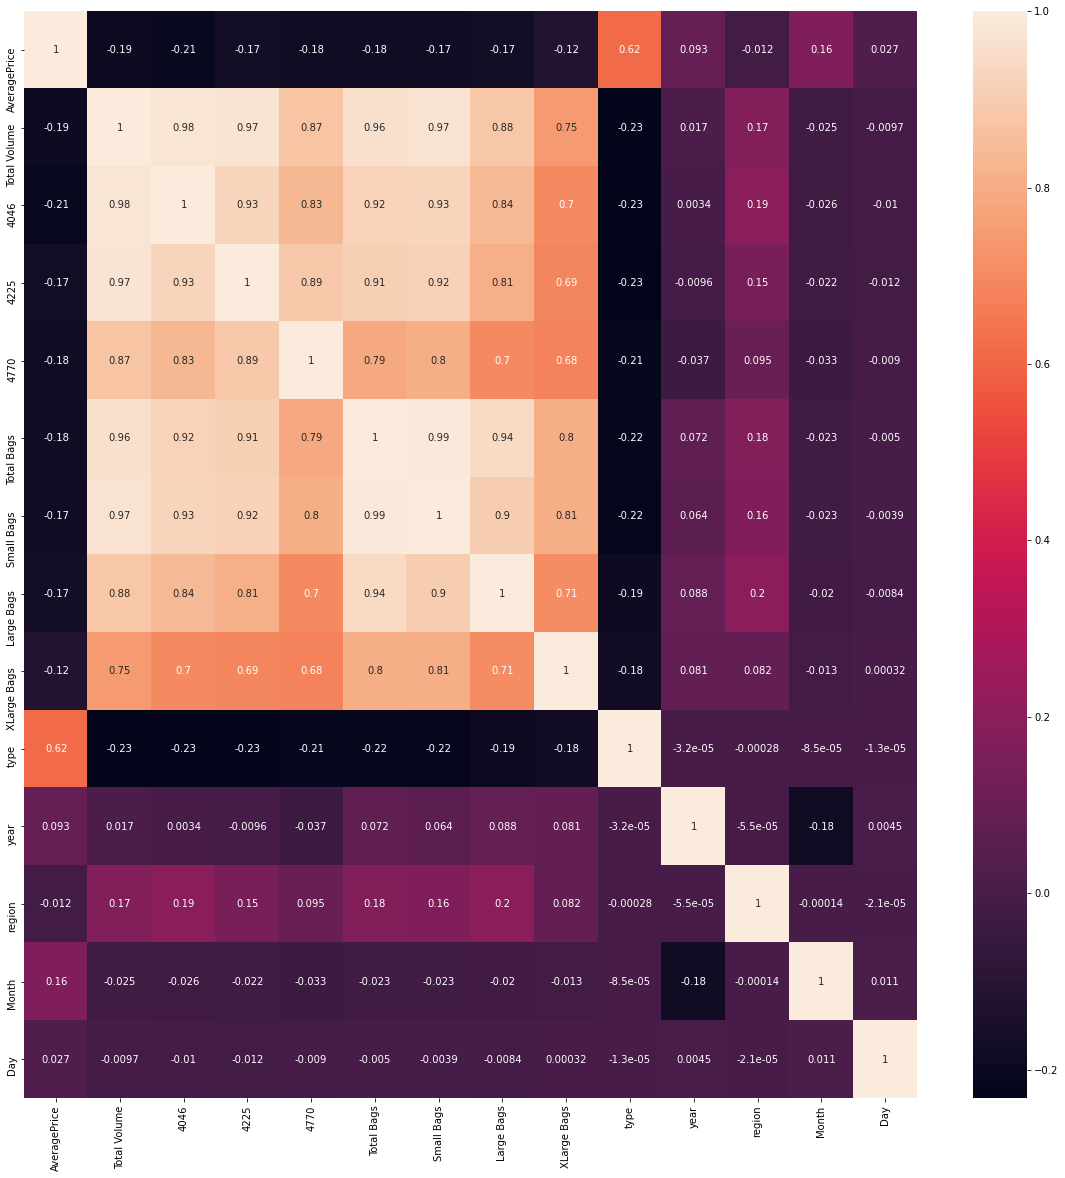

In [ ]:
#Visualization for correlation matrix
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),annot=True)
plt.show()

Type has the highest correlation to the AveragePrice.

In [ ]:
#Correlation wrt target column
df.corr()['AveragePrice'].sort_values()

4046           -0.208317
Total Volume   -0.192752
4770           -0.179446
Total Bags     -0.177088
Small Bags     -0.174730
Large Bags     -0.172940
4225           -0.172928
XLarge Bags    -0.117592
region         -0.011716
Day             0.027386
year            0.093197
Month           0.162409
type            0.615845
AveragePrice    1.000000
Name: AveragePrice, dtype: float64

In [ ]:
#Correlation wrt target column
df.corr()['region'].sort_values()

AveragePrice   -0.011716
type           -0.000280
Month          -0.000144
year           -0.000055
Day            -0.000021
XLarge Bags     0.082281
4770            0.095252
4225            0.145726
Small Bags      0.164702
Total Volume    0.174176
Total Bags      0.175256
4046            0.192073
Large Bags      0.198768
region          1.000000
Name: region, dtype: float64

# Outliers

We use the zscore method to remove the outliers with a threshold of 3

In [ ]:
z = np.abs(zscore(df))
df_new = df[(z<3).all(axis=1)]

In [ ]:
df_new.shape

(17651, 14)

In [ ]:
print('Percentage loss of data =\t', ((df.shape[0]-df_new.shape[0])/df.shape[0])*100, '%')

Percentage loss of data =	 3.276891884486821 %


# Skewness

Now, we split the data into feature and target columns. We do that in two parts as we produce model for 2 target columns

In [ ]:
# Target = AveragePrice
x1 = df.drop(columns='AveragePrice')
y1 = df['AveragePrice']

In [ ]:
# Target = region
x2 = df.drop(columns='region')
y2 = df['region']

Treating skewness for Target 1

In [ ]:
x1.skew()

Total Volume     9.007687
4046             8.648220
4225             8.942466
4770            10.159396
Total Bags       9.756072
Small Bags       9.540660
Large Bags       9.796455
XLarge Bags     13.139751
type             0.000329
year             0.215339
region           0.000030
Month            0.106617
Day              0.014310
dtype: float64

In [ ]:
k = []
for i in x1.columns:
    k.append(np.abs(x1[i].skew()))

b=0
for i in x1.columns:
    if k[b]>0.5:
        x1[i] = np.log1p(x1[i])
    b+=1

In [ ]:
x1.skew()

Total Volume    0.088098
4046           -0.328195
4225           -0.486654
4770            0.099986
Total Bags     -0.218874
Small Bags     -0.622148
Large Bags     -0.547765
XLarge Bags     1.176494
type            0.000329
year            0.215339
region          0.000030
Month           0.106617
Day             0.014310
dtype: float64

Treating skewness for Target 2

In [ ]:
x2.skew()

AveragePrice     0.580303
Total Volume     9.007687
4046             8.648220
4225             8.942466
4770            10.159396
Total Bags       9.756072
Small Bags       9.540660
Large Bags       9.796455
XLarge Bags     13.139751
type             0.000329
year             0.215339
Month            0.106617
Day              0.014310
dtype: float64

In [ ]:
k = []
for i in x2.columns:
    k.append(np.abs(x2[i].skew()))

b=0
for i in x2.columns:
    if k[b]>0.5:
        x2[i] = np.log1p(x2[i])
    b+=1

In [ ]:
x2.skew()

AveragePrice    0.138629
Total Volume    0.088098
4046           -0.328195
4225           -0.486654
4770            0.099986
Total Bags     -0.218874
Small Bags     -0.622148
Large Bags     -0.547765
XLarge Bags     1.176494
type            0.000329
year            0.215339
Month           0.106617
Day             0.014310
dtype: float64

# Scaling the data for model

In [ ]:
sc=StandardScaler()
x1 = sc.fit_transform(x1)
x2 = sc.fit_transform(x2)

# Prediction for AveragePrice

## Random State

In [ ]:
maxRS = 0
maxAcc = 0
for i in range(0,100):
    x_train, x_test, y_train, y_test = train_test_split(x1, y1, test_size=0.20, random_state=i)
    lr = LinearRegression()
    lr.fit(x_train,y_train)
    pred = lr.predict(x_test)
    acc = r2_score(y_test, pred)
    if acc>maxAcc:
        maxAcc = acc
        maxRS = i
print("Max accuracy: \t", maxAcc)
print("Random State: \t", maxRS)

Max accuracy: 	 0.5780244358065088
Random State: 	 50


Now since we got the best random state for data modelling, we create the test train models

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x1, y1, test_size=0.20, random_state=maxRS)

## Model Predictions

Linear Regression

In [ ]:
lr = LinearRegression()
lr.fit(x_train,y_train)
pred = lr.predict(x_test)
print("r2 score: \t", r2_score(y_test,pred)*100)
print("Mean Square Error : \t", mean_squared_error(y_test,pred))
print("Root Mean Square Error : \t", np.sqrt(mean_squared_error(y_test,pred)))

r2 score: 	 57.80244358065087
Mean Square Error : 	 0.07145908347167756
Root Mean Square Error : 	 0.2673183186234673


Ridge Regression

In [ ]:
rr = Ridge()
rr.fit(x_train,y_train)
pred = rr.predict(x_test)
print("r2 score: \t", r2_score(y_test,pred)*100)
print("Mean Square Error : \t", mean_squared_error(y_test,pred))
print("Root Mean Square Error : \t", np.sqrt(mean_squared_error(y_test,pred)))

r2 score: 	 57.80193914022181
Mean Square Error : 	 0.07145993771191765
Root Mean Square Error : 	 0.26731991641461667


KNN MODEL

In [ ]:
knn = KNeighborsRegressor()
knn.fit(x_train,y_train)
pred = knn.predict(x_test)
print("r2 score: \t", r2_score(y_test,pred)*100)
print("Mean Square Error : \t", mean_squared_error(y_test,pred))
print("Root Mean Square Error : \t", np.sqrt(mean_squared_error(y_test,pred)))

r2 score: 	 82.04040590400425
Mean Square Error : 	 0.03041351780821918
Root Mean Square Error : 	 0.17439471840689208


SUPPORT VECTOR MACHINES

In [ ]:
svr = SVR()
svr.fit(x_train,y_train)
pred = svr.predict(x_test)
print("r2 score: \t", r2_score(y_test,pred)*100)
print("Mean Square Error : \t", mean_squared_error(y_test,pred))
print("Root Mean Square Error : \t", np.sqrt(mean_squared_error(y_test,pred)))

r2 score: 	 79.9102479490455
Mean Square Error : 	 0.03402081519763524
Root Mean Square Error : 	 0.1844473236391226


Random Forest Regressor

In [ ]:
rf = RandomForestRegressor()
rf.fit(x_train,y_train)
pred = rf.predict(x_test)
print("r2 score: \t", r2_score(y_test,pred)*100)
print("Mean Square Error : \t", mean_squared_error(y_test,pred))
print("Root Mean Square Error : \t", np.sqrt(mean_squared_error(y_test,pred)))

r2 score: 	 89.85101818219673
Mean Square Error : 	 0.017186704643835614
Root Mean Square Error : 	 0.13109807261678416


Decision Tree Regressor

In [ ]:
dt = DecisionTreeRegressor()
dt.fit(x_train,y_train)
pred = dt.predict(x_test)
print("r2 score: \t", r2_score(y_test,pred)*100)
print("Mean Square Error : \t", mean_squared_error(y_test,pred))
print("Root Mean Square Error : \t", np.sqrt(mean_squared_error(y_test,pred)))

r2 score: 	 78.55301736506958
Mean Square Error : 	 0.036319205479452055
Root Mean Square Error : 	 0.1905759834802173


Out of all the models Random Forest Regressor and the KNN model has the highest r2_score

## Cross validation

In [ ]:
scr1 = cross_val_score(lr, x1, y1, cv=5, scoring='r2')
print("Cross validation score of Linear Regression is: \t", scr1.mean())

Cross validation score of Linear Regression is: 	 0.21062791988368312


In [ ]:
scr2 = cross_val_score(rr, x1, y1, cv=5, scoring='r2')
print("Cross validation score of Ridge Regression is: \t", scr2.mean())

Cross validation score of Ridge Regression is: 	 0.21071472321299875


In [ ]:
scr3 = cross_val_score(dt, x1, y1, cv=5)
print("Cross validation score of Decision Tree Regressor is: \t", scr3.mean())

Cross validation score of Decision Tree Regressor is: 	 -0.34611036368917986


In [ ]:
scr4 = cross_val_score(rf, x1, y1, cv=5)
print("Cross validation score of Random Forest Regressor is: \t", scr4.mean())

Cross validation score of Random Forest Regressor is: 	 0.20412409738117146


In [ ]:
scr5 = cross_val_score(knn, x1, y1, cv=5)
print("Cross validation score of KNeighbour Regressor is: \t", scr5.mean())

Cross validation score of KNeighbour Regressor is: 	 0.0590705556254187


In [ ]:
scr6 = cross_val_score(svr, x1, y1, cv=5)
print("Cross validation score of SVM is: \t", scr6.mean())

Cross validation score of SVM is: 	 0.09019415873505536


## Hyper Parameter Tuning

In [ ]:
GridSearchCV.get_params(rf)

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [ ]:
parameters = {'bootstrap': [True,False],
              'max_depth': [10, 20, 30, 40, None],
              'max_features': ('auto','sqrt'),
              'min_samples_leaf': [1,2,4,8],
              'min_samples_split': [2,5,10],
              'n_estimators': [100,200,300,500]}

In [ ]:
gcv = GridSearchCV(rf, parameters, cv=5, scoring='r2')

In [ ]:
gcv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'bootstrap': [True,False], 'max_depth': [10, 20, 30, 40, None],
                         'max_features': ('auto', 'sqrt'),
                         'min_samples_leaf': [1,2,4,8], 'min_samples_split': [2,5,10],
                         'n_estimators': [100,200,300,500]},
             scoring='r2')

In [ ]:
print("Tuned Hyperparameters :", gcv.best_params_)
print("Accuracy :",gcv.best_score_)

Tuned Hyperparameters : {'bootstrap': True, 'max_depth': None, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Accuracy : 0.8778575137359145


In [ ]:
gcv_pred = gcv.best_estimator_.predict(x_test)
r2_score(y_test,gcv_pred)

0.8986701190817927

The best estimator gives the accuracy of 89.86% and hence we shall save this model.

## Saving the best model

In [ ]:
joblib.dump(gcv.best_estimator_,"avo_price.pkl")

['avo_price.pkl']

# Prediction for Region

## Best Random State

In [ ]:
maxRS = 0
maxAcc = 0
for i in range(40,100):
    x_train, x_test, y_train, y_test = train_test_split(x2, y2, test_size=0.20, random_state=i)
    lr2 = LogisticRegression()
    lr2.fit(x_train,y_train)
    pred = lr2.predict(x_test)
    acc = accuracy_score(y_test, pred)
    if acc>maxAcc:
        maxAcc = acc
        maxRS = i
print("Max accuracy: \t", maxAcc)
print("Random State: \t", maxRS)

Max accuracy: 	 0.5671232876712329
Random State: 	 85


Now since we got the best random state for data modelling, we create the test train models

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x2, y2, test_size=0.20, random_state=maxRS)

## Model Predictions

Logistic Regression

In [ ]:
lr2 = LogisticRegression()
lr2.fit(x_train,y_train)
pred = lr2.predict(x_test)
print("Accuracy: \t", accuracy_score(y_test,pred)*100)
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

Accuracy: 	 56.71232876712329
[[49  0  0 ...  0  0  0]
 [ 0 29  0 ...  0  0  0]
 [ 0  0 32 ...  0  0  4]
 ...
 [ 0  0  0 ... 71  0  0]
 [ 0  0  0 ...  0 67  0]
 [ 0  2  1 ...  0  0 18]]
              precision    recall  f1-score   support

         0.0       0.71      0.67      0.69        73
         1.0       0.31      0.38      0.34        76
         2.0       0.74      0.54      0.63        59
         3.0       0.48      0.43      0.46        60
         4.0       0.66      0.56      0.60        70
         5.0       0.53      0.46      0.49        65
         6.0       0.89      0.93      0.91        70
         7.0       0.64      0.68      0.66        72
         8.0       0.79      0.81      0.80        70
         9.0       0.48      0.78      0.59        68
        10.0       0.59      0.70      0.64        69
        11.0       0.56      0.75      0.64        64
        12.0       0.43      0.51      0.47        67
        13.0       0.37      0.38      0.38        65
   

K-Nearest Neighbors

In [ ]:
knn2 = KNeighborsClassifier()
knn2.fit(x_train, y_train)
pred = knn2.predict(x_test)
print("Accuracy: \t", accuracy_score(y_test,pred)*100)
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

Accuracy: 	 65.01369863013699
[[67  0  0 ...  0  0  0]
 [ 0 44  0 ...  0  0  0]
 [ 0  0 51 ...  0  0  0]
 ...
 [ 0  0  0 ... 71  0  0]
 [ 0  0  0 ...  0 61  0]
 [ 0  5  1 ...  0  0 32]]
              precision    recall  f1-score   support

         0.0       0.65      0.92      0.76        73
         1.0       0.44      0.58      0.50        76
         2.0       0.65      0.86      0.74        59
         3.0       0.67      0.73      0.70        60
         4.0       0.71      0.83      0.76        70
         5.0       0.58      0.60      0.59        65
         6.0       0.73      0.87      0.79        70
         7.0       0.48      0.75      0.59        72
         8.0       0.84      0.83      0.83        70
         9.0       0.44      0.60      0.51        68
        10.0       0.36      0.52      0.43        69
        11.0       0.64      0.81      0.72        64
        12.0       0.87      0.81      0.84        67
        13.0       0.55      0.51      0.53        65
   

Support Vector Classifier

In [ ]:
svc2 = SVC()
svc2.fit(x_train, y_train)
pred = svc2.predict(x_test)
print("Accuracy: \t", accuracy_score(y_test,pred)*100)
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

Accuracy: 	 79.67123287671232
[[66  0  0 ...  0  0  0]
 [ 0 46  0 ...  0  0  0]
 [ 0  0 59 ...  0  0  0]
 ...
 [ 0  0  0 ... 71  0  0]
 [ 0  0  0 ...  0 71  0]
 [ 0  2  1 ...  0  0 61]]
              precision    recall  f1-score   support

         0.0       0.74      0.90      0.81        73
         1.0       0.62      0.61      0.61        76
         2.0       0.94      1.00      0.97        59
         3.0       0.70      0.70      0.70        60
         4.0       0.91      0.86      0.88        70
         5.0       0.88      0.69      0.78        65
         6.0       0.95      0.99      0.97        70
         7.0       0.79      0.75      0.77        72
         8.0       0.97      1.00      0.99        70
         9.0       0.71      0.82      0.76        68
        10.0       0.58      0.83      0.68        69
        11.0       0.82      0.94      0.88        64
        12.0       0.88      0.91      0.90        67
        13.0       0.65      0.63      0.64        65
   

Decision Tree Classifier

In [ ]:
dt2 = DecisionTreeClassifier()
dt2.fit(x_train,y_train)
pred = dt2.predict(x_test)
print("Accuracy: \t", accuracy_score(y_test,pred)*100)
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

Accuracy: 	 80.57534246575344
[[58  0  0 ...  0  0  0]
 [ 0 61  0 ...  0  0  1]
 [ 0  0 54 ...  0  0  0]
 ...
 [ 0  0  0 ... 71  0  0]
 [ 0  0  0 ...  1 68  0]
 [ 0  0  1 ...  0  0 64]]
              precision    recall  f1-score   support

         0.0       0.77      0.79      0.78        73
         1.0       0.71      0.80      0.75        76
         2.0       0.93      0.92      0.92        59
         3.0       0.72      0.80      0.76        60
         4.0       0.84      0.87      0.85        70
         5.0       0.75      0.74      0.74        65
         6.0       0.93      0.96      0.94        70
         7.0       0.73      0.76      0.75        72
         8.0       0.97      0.93      0.95        70
         9.0       0.76      0.85      0.81        68
        10.0       0.70      0.78      0.74        69
        11.0       0.85      0.89      0.87        64
        12.0       0.81      0.84      0.82        67
        13.0       0.75      0.68      0.71        65
   

Random Forest Classifier

In [ ]:
rf2 = RandomForestClassifier()
rf2.fit(x_train,y_train)
pred = rf2.predict(x_test)
print("Accuracy: \t", accuracy_score(y_test,pred)*100)
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

Accuracy: 	 91.04109589041096
[[70  0  0 ...  0  0  0]
 [ 0 68  0 ...  0  0  0]
 [ 0  0 58 ...  0  0  0]
 ...
 [ 0  0  0 ... 71  0  0]
 [ 0  0  0 ...  1 73  0]
 [ 0  0  1 ...  0  0 71]]
              precision    recall  f1-score   support

         0.0       0.88      0.96      0.92        73
         1.0       0.83      0.89      0.86        76
         2.0       0.95      0.98      0.97        59
         3.0       0.88      0.85      0.86        60
         4.0       0.97      0.96      0.96        70
         5.0       0.93      0.78      0.85        65
         6.0       0.96      0.99      0.97        70
         7.0       0.89      0.93      0.91        72
         8.0       0.99      1.00      0.99        70
         9.0       0.89      0.94      0.91        68
        10.0       0.82      0.88      0.85        69
        11.0       0.89      0.98      0.93        64
        12.0       0.96      0.97      0.96        67
        13.0       0.88      0.78      0.83        65
   

We see that the Random Forest Classifier and the Decision Tree Classifier model gives the most efficiency

## Cross Validation

In [ ]:
scr1 = cross_val_score(lr2, x2, y2, cv=5)
print("Cross validation score of Logistic Regression is: \t", scr1.mean())

Cross validation score of Logistic Regression is: 	 0.4133875972775428


In [ ]:
scr2 = cross_val_score(knn2, x2, y2, cv=5)
print("Cross validation score of KNN is: \t", scr2.mean())

Cross validation score of KNN is: 	 0.4331156368605398


In [ ]:
scr3 = cross_val_score(svc2, x2, y2, cv=5)
print("Cross validation score of SVC is: \t", scr3.mean())

Cross validation score of SVC is: 	 0.5975030576964228


In [ ]:
scr4 = cross_val_score(dt2, x2, y2, cv=5)
print("Cross validation score of Decision Tree is: \t", scr4.mean())

Cross validation score of Decision Tree is: 	 0.5501589701813596


In [ ]:
scr5 = cross_val_score(rf2, x2, y2, cv=5)
print("Cross validation score of Random Forest is: \t", scr5.mean())

Cross validation score of Random Forest is: 	 0.6787660045724668


We can see that 'Random Forest' performs the best among others

## Hyper Parameter Tuning

In [ ]:
GridSearchCV.get_params(rf2)

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [ ]:
parameters = {'bootstrap': [True, False],
              'max_depth': [10, 20, 30, 40, None],
              'max_features': ('auto','sqrt')
              'min_samples_leaf': [1,2,4,8],
              'min_samples_split': [2,3,5],
              'n_estimators': [100,200,300,400,500]}

In [ ]:
gcv2 = GridSearchCV(rf2, parameters, cv=5, scoring='accuracy')

In [ ]:
gcv2.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False], 'max_depth': [10, 20, 30, 40, None],
                         'max_features': ('auto','sqrt'), 'min_samples_leaf': [1,2,4,8],
                         'min_samples_split': [2,3,5],'n_estimators': [100,200,300,400,500]},
             scoring='accuracy')

In [ ]:
gcv2.best_score_

0.9032128895709264

In [ ]:
gcv2.best_params_

{'bootstrap': True,
 'max_depth': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 100}

In [ ]:
RF2 = RandomForestClassifier(**gcv2.best_params_)

In [ ]:
RF2.fit(x_train,y_train)

RandomForestClassifier()

In [ ]:
pred = RF2.predict(x_test)
accuracy_score(y_test,pred)

0.9090410958904109

In [ ]:
gcv_pred = gcv2.best_estimator_.predict(x_test)
accuracy_score(y_test,gcv_pred)

0.9175342465753424

gcv best estimator gives the efficiency of 91.71% and we shall save this model

## Saving the best model

In [ ]:
joblib.dump(gcv2.best_estimator_,"avo_range.pkl")

['avo_range.pkl']